## Linear Regression and Logistic Regression

## 1. Setup

In [31]:
# Dataset: Boston Data
# The data set contain housing values in 506 suburbs of Boston.
# Source:
# https://github.com/intro-stat-learning/ISLP/blob/main/ISLP/data/Boston.csv
# https://github.com/intro-stat-learning/ISLP/blob/main/docs/jupyterbook/datasets/Boston.md 

In [32]:
# All these packages are required
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as inf
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset with pandas
data = pd.read_csv('College.csv')

In [33]:
# Displaying the first 5 rows
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,GradRate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [34]:
# Information about the predictors
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  GradRate     777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [35]:
# Evaluation set with 5 rows represented as a dictionary
data_points = [
    {'Apps':0.1,'Accept':3.0,'Enroll':1.0, 'Top10perc ':30.5},
    {'Apps':0.2,'Accept':4.0,'Enroll':2.5, 'Top10perc':10.0},
    {'Apps':0.15,'Accept':5.0,'Enroll':7.0, 'Top10perc':5.0},
    {'Apps':0.25,'Accept':3.0,'Enroll':4.5, 'Top10perc':30.0},
    {'Apps':0.05,'Accept':6.0,'Enroll':5.8, 'Top10perc':6.5}
]

In [36]:
#data.dtypes
#data['Apps']=data['Apps'].astype(float)

In [37]:
#data['Apps'].unique

## 2. Multicollinearity

array([[<Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Accept', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>,
        <Axes: xlabel='Top10perc', ylabel='Apps'>],
       [<Axes: xlabel='Apps', ylabel='Accept'>,
        <Axes: xlabel='Accept', ylabel='Accept'>,
        <Axes: xlabel='Enroll', ylabel='Accept'>,
        <Axes: xlabel='Top10perc', ylabel='Accept'>],
       [<Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Accept', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>,
        <Axes: xlabel='Top10perc', ylabel='Enroll'>],
       [<Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Accept', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>,
        <Axes: xlabel='Top10perc', ylabel='Top10perc'>]], dtype=object)

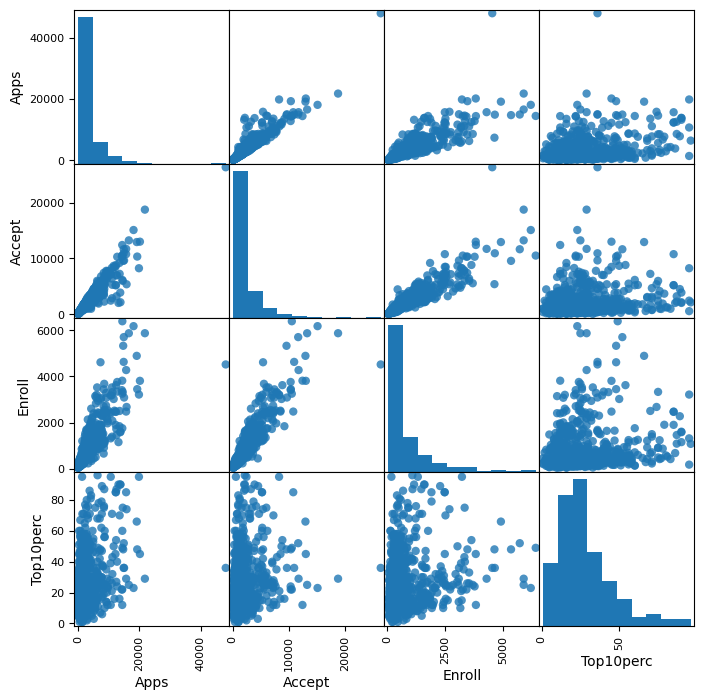

In [38]:
selected_predictors = ['Apps', 'Accept','Enroll', 'Top10perc']
X = data[selected_predictors]
pd.plotting.scatter_matrix(X, figsize=(8, 8), alpha=0.8, marker='o', diagonal='hist' )

In [39]:
# Visual Observations:
# - crim: Appears to have no obvious correlation with the other predictors.
# - rm: Displays a possible correlation with both lstat and medv.
# - dis: Shows no clear correlation with the other predictors.
# - lstat: Seems to correlate with rm and medv.
# - medv: Indicates a potential correlation with rm and lstat.

In [40]:
# VIF (Variance Inflation Factor) 
for i in range(X.shape[1]):
    vif = inf.variance_inflation_factor(X.values, i) # Compute VIF 
    print(f"VIF for {X.columns[i]}: \t{vif:10.3f}")

VIF for Apps: 	    16.629
VIF for Accept: 	    26.787
VIF for Enroll: 	    10.221
VIF for Top10perc: 	     1.852


In [41]:
# Observations from VIF:
# crim (Per capita crime rate by town) -  Low VIF; limited multicollinearity with other predictors.
# rm (Average number of rooms per dwelling) – Very High VIF; strong multicollinearity suggests rm might be predictable from other variables.
# dis (Distances to employment centers) - Moderate VIF; some multicollinearity present.
# lstat (% lower status of the population) - Moderate VIF; some multicollinearity with other predictors.
# medv (Median value of homes in $1000s)- Very high VIF; strong multicollinearity with other predictors.

## 3. Simple Linear Regression

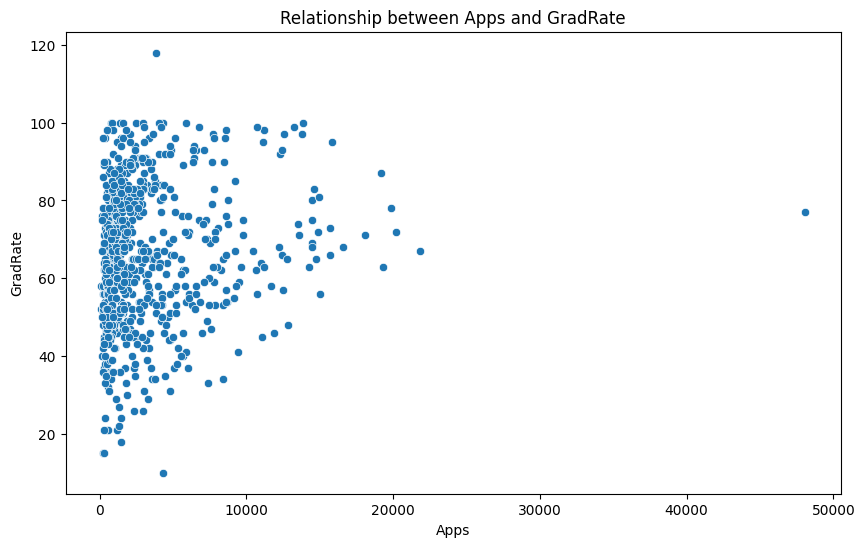

In [42]:
# Scatter plot
# Using 'lstat' as predictor and 'medv' as response
X = data['Apps']
y = data['GradRate']

# Plotting the data
plt.figure(figsize=(10,6))
sns.scatterplot(x='Apps', y='GradRate', data=data)
plt.title('Relationship between Apps and GradRate')
plt.show()

In [43]:
# Fiting a Linear Model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Printing a summary
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GradRate   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     17.06
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           4.02e-05
Time:                        02:28:25   Log-Likelihood:                -3303.0
No. Observations:                 777   AIC:                             6610.
Df Residuals:                     775   BIC:                             6619.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.5082      0.772     82.253      0.000      61.992      65.024
Apps           0.0007      0.000      4.130      0.000       0.000       0.001
==============================================================================
Omnibus:                        4.488   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                4.059
Skew:                          -0.116   Prob(JB):                        0.131
Kurtosis:                       2.732   Cond. No.                     6.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# Observations:
# Intercept coeficient: 34.5538. 
# lstat coeficient: - 0.95. For every one-unit increase in lstat, the medv is expected to decrease by 
#                     approximately 0.9500 units
# R-squared: 0.544 – This suggests that approximately 54.4% of the variability in the dependent variable, medv, 
#                    can be explained by the model. In simpler terms, the model captures over half of the 
#                    variability in house values (medv) using lstat as a predictor.

### Model equation:   
### $\hat{medv_i} = 34.5538 - 0.95 \times lstat_i$

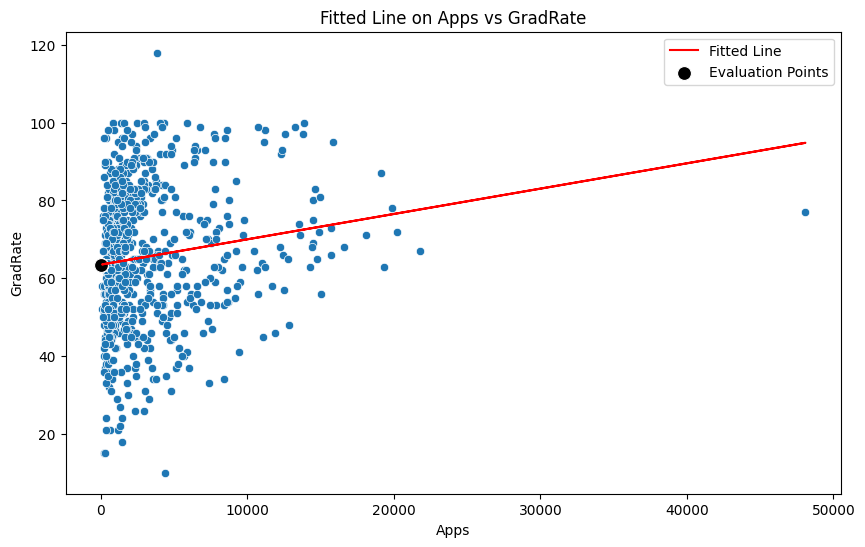

In [45]:
# Ploting the regresion line and evaluation points
# Get a list of the evaluation points for Apps
Apps_values = []
for point in data_points:
    Apps_values.append(point['Apps'])

# Least squares coefficients
beta_1 = model.params['Apps']
beta_0 = model.params['const']    
    
# Extracting medv values using the regression equation for these lstat values
GradRate= beta_0 + beta_1 * np.array(Apps_values)
# Original plot with scatter points and regression line
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Apps'], y=data['GradRate'])
plt.plot(data['Apps'], beta_0 + beta_1 * data['Apps'], color='red', label="Fitted Line")

# Adding the points from the dictionary with a different color and size
sns.scatterplot(x=Apps_values, y=GradRate, color='black', s=100, label="Evaluation Points")

# Title and legend
plt.title('Fitted Line on Apps vs GradRate')
plt.legend()
plt.savefig('s_linear.png')
plt.show()


## 4. Multiple Linear Regression

In [46]:
# Subset of the data with 4 predictors
X = pd.DataFrame(data[["Apps", "Accept","Enroll", "Top10perc"]])
y = data['GradRate']

# Fiting a Linear Model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Printing a summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GradRate   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     78.97
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           3.58e-56
Time:                        02:28:29   Log-Likelihood:                -3178.2
No. Observations:                 777   AIC:                             6366.
Df Residuals:                     772   BIC:                             6390.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.0176      1.088     48.722      0.000      50.881      55.154
Apps          -0.0001      0.000     -0.317      0.751      -0.001       0.001
Accept         0.0033      0.001      3.691      0.000       0.002       0.005
Enroll        -0.0095      0.001     -6.941      0.000      -0.012      -0.007
Top10perc      0.4958      0.034     14.390      0.000       0.428       0.563
==============================================================================
Omnibus:                        3.754   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                4.224
Skew:                           0.053   Prob(JB):                        0.121
Kurtosis:                       3.345   Cond. No.                     1.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# Observations:
# The R-squared value for the multiple linear regression model is higher (0.658 vs. 0.544), 
# indicating that this model explains a greater proportion of the variance in the dependent variable (medv). 
# The inclusion of more predictors seems to have improved the fit of the model.
# The signs and magnitudes of the coefficients give insights into the relationships between predictors and medv. 
# For instance, rm has a positive relationship with medv, and for each additional room, medv increases by approximately 4.9765 units. 
# Notably, the coefficient of lstat has reduced in the multiple regression model compared to the simple linear regression.

### Model equation:
### $\hat{medv_i} = 2.2306 - 0.1281 \times crim_i + 4.9765 \times rm_i - 0.5632 \times dis_i - 0.6617 \times lstat_i$

In [48]:
["Apps", "Accept","Enroll", "Top10perc"] ,'GradRate'

(['Apps', 'Accept', 'Enroll', 'Top10perc'], 'GradRate')


Predictions for the Evaluation Set:
0    68.139972
1    57.964962
2    55.446338
3    67.858673
4    56.204803
dtype: float64


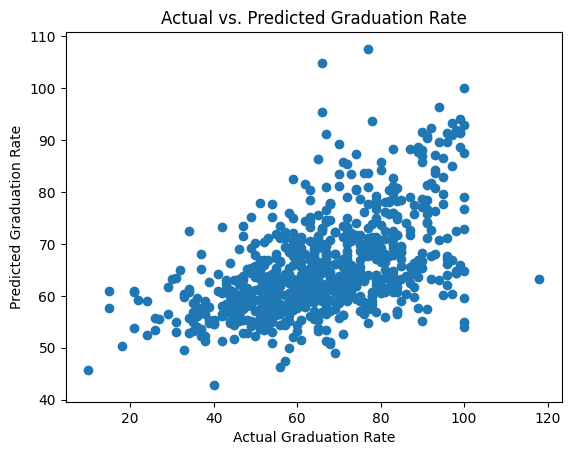

In [51]:
# Assuming 'evaluation_data' is a DataFrame containing evaluation set with columns ['Apps', 'Accept', 'Enroll', 'Top10perc']
evaluation_data = pd.DataFrame()

# Create empty lists to store values
Apps_values = []
Accept_values = []
Enroll_values = []
Top10perc_values = []

# Iterate through data_points
for point in data_points:
    # Clean keys by stripping whitespaces
    cleaned_point = {key.strip(): value for key, value in point.items()}
    
    # Append values to respective lists
    Apps_values.append(cleaned_point["Apps"])
    Accept_values.append(cleaned_point["Accept"])
    Enroll_values.append(cleaned_point["Enroll"])
    Top10perc_values.append(cleaned_point["Top10perc"])

# Add lists as columns to the evaluation_data DataFrame
evaluation_data['Apps'] = Apps_values
evaluation_data['Accept'] = Accept_values
evaluation_data['Enroll'] = Enroll_values
evaluation_data['Top10perc'] = Top10perc_values

# Adding a constant term to the evaluation set
evaluation_data = sm.add_constant(evaluation_data)

# Predicting GradRate for the evaluation set
predictions = model.predict(evaluation_data)

# Displaying the predicted values
print("\nPredictions for the Evaluation Set:")
print(predictions)
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted GradRate using the training set
plt.scatter(y, model.fittedvalues)
plt.title('Actual vs. Predicted Graduation Rate')
plt.xlabel('Actual Graduation Rate')
plt.ylabel('Predicted Graduation Rate')
plt.savefig('m_linear.png')
plt.show()




## 5. Logistic Regression

In [21]:
# Create a binary variable for high crime (1 if crime rate > median, 0 otherwise)
print(data.columns)
median_sf_ratio = data['S.F.Ratio'].median()
data['BinaryTarget'] = np.where(data['S.F.Ratio'] > median_sf_ratio, 1, 0)

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'GradRate'],
      dtype='object')


In [22]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,GradRate,BinaryTarget
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000,777.000000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332,0.494208
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771,0.500288
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000,0.000000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000,0.000000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000,0.000000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000,1.000000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000,1.000000


In [23]:
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,GradRate,BinaryTarget
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0


In [24]:
#prepare data for logistic regression model.
# Selecting two predictors, for example, 'Apps' and 'Accept'
X = data[['Apps', 'Accept']]
X = sm.add_constant(X) # adding a constant for intercept
y = data['BinaryTarget']

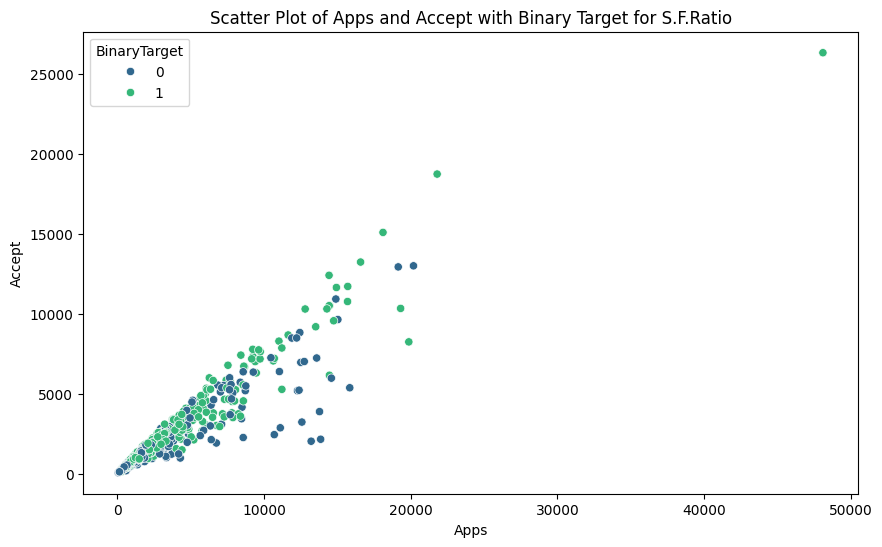

In [25]:
# Visualizing the data with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Apps', y='Accept', hue='BinaryTarget', data=data, palette='viridis')
plt.title('Scatter Plot of Apps and Accept with Binary Target for S.F.Ratio')
plt.xlabel('Apps')
plt.ylabel('Accept')
plt.savefig('l_regression.png')
plt.show()

In [26]:
# Build the logistic regression model
model = sm.Logit(y, X).fit()

# Display model summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.656448
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           BinaryTarget   No. Observations:                  777
Model:                          Logit   Df Residuals:                      774
Method:                           MLE   Df Model:                            2
Date:                Sat, 09 Dec 2023   Pseudo R-squ.:                 0.05285
Time:                        02:16:18   Log-Likelihood:                -510.06
converged:                       True   LL-Null:                       -538.52
Covariance Type:            nonrobust   LLR p-value:                 4.351e-13
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4465      0.103     -4.345      0.000      -0.648      -0.245
Apps          -0.0003   7.83e-05     -4.099      0.000      -0.000      -0.000
Accept         0.0007      0.000      5.432      0.000       0.000       0.001
==============================================================================
"""

In [27]:
# Observations:
# dis: For a one-unit increase in dis, the log odds of HighCrime decrease by 0.9131, holding other predictors constant.
# It suggests that areas further from employment centers (dis) are less likely to be high crime areas.
# lstat: For a one-unit increase in lstat, the log odds of HighCrime increase by 0.0802, holding other predictors constant. 
# It suggests that areas with a higher percentage of lower status population (lstat) are more likely to be high crime areas.
# Constant (Intercept): The constant term is 2.2297, which represents the log odds of HighCrime when all predictors are zero. 

### Model equation:
### $\log\left(\frac{p}{1-p}\right) = 2.2297 - 0.9131 \times \text{Apps} + 0.0802 \times \text{Accept}$
### $p = \frac{e^{(2.2297 - 0.9131 \times \text{Apps} + 0.0802 \times \text{Accept})}}{1 + e^{(2.2297 - 0.9131 \times \text{Apps} + 0.0802 \times \text{Accept})}}$

In [28]:
# Extracting coefficients
coefficients = model.params

# Constructing the model equation
equation = f"log(odds) = {coefficients['const']:.4f} + " \
           f"{coefficients['Apps']:.4f} * Apps + " \
           f"{coefficients['Accept']:.4f} * Accept"

print("\nModel Equation:")
print(equation)

# Predict the probability of the target for each point in the evaluation set
# Assuming 'evaluation_data' is a DataFrame containing evaluation set with columns ['Apps', 'Accept']
evaluation_data = pd.DataFrame({
    'Apps': [value['Apps'] for value in data_points],
    'Accept': [value['Accept'] for value in data_points]
})

# Adding a constant term to the evaluation set
evaluation_data = sm.add_constant(evaluation_data)

# Predicting the probability of the target
probabilities = model.predict(evaluation_data)

# Displaying the predicted probabilities
print("\nPredicted Probabilities for the Evaluation Set:")
print(probabilities)


Model Equation:
log(odds) = -0.4465 + -0.0003 * Apps + 0.0007 * Accept

Predicted Probabilities for the Evaluation Set:
0    0.390692
1    0.390851
2    0.391022
3    0.390680
4    0.391196
dtype: float64
